# Práctica regresión lineal - Nicolò Trevisani

In [27]:
my.data <- read.csv("CdP_practica_estadistica.csv", sep = ",")
str(my.data)
my.data <- na.omit(my.data)
str(my.data)

'data.frame':	730 obs. of  10 variables:
 $ date         : Factor w/ 730 levels "01/01/2014 0:03",..: 1 25 49 73 97 121 145 169 193 217 ...
 $ AVG.Temp.    : num  4,00 4,06 4,13 4,19 4,35 ...
 $ AVG.Press.   : num  9,62 3,94 3,99 3,95 9,39 ...
 $ AVG.Cond.    : num  0,0407 0,0399 0,0377 0,0346 0,0313 ...
 $ AVG.Salinity.: num  0,0304 0,0298 0,0281 0,0257 0,0232 ...
 $ AVG.DO.      : num  13,6 13,6 13,6 13,6 13,5 ...
 $ AVG.rawO2.   : num  558 557 559 560 561 ...
 $ AVG.OxySat.  : num  104 104 104 104 104 ...
 $ AVG.pH.      : num  8,13 8,11 8,05 7,97 7,90 ...
 $ AVG.Redox.   : num  356 359 360 362 358 ...
'data.frame':	683 obs. of  10 variables:
 $ date         : Factor w/ 730 levels "01/01/2014 0:03",..: 1 25 49 73 97 121 145 169 193 217 ...
 $ AVG.Temp.    : num  4,00 4,06 4,13 4,19 4,35 ...
 $ AVG.Press.   : num  9,62 3,94 3,99 3,95 9,39 ...
 $ AVG.Cond.    : num  0,0407 0,0399 0,0377 0,0346 0,0313 ...
 $ AVG.Salinity.: num  0,0304 0,0298 0,0281 0,0257 0,0232 ...
 $ AVG.DO.      : n

In [28]:
my.data$date <- as.Date(my.data$date, "%d/%m/%Y %H:%M")

In [29]:
str(my.data)

'data.frame':	683 obs. of  10 variables:
 $ date         : Date, format: "2014-01-01" "2014-01-02" ...
 $ AVG.Temp.    : num  4,00 4,06 4,13 4,19 4,35 ...
 $ AVG.Press.   : num  9,62 3,94 3,99 3,95 9,39 ...
 $ AVG.Cond.    : num  0,0407 0,0399 0,0377 0,0346 0,0313 ...
 $ AVG.Salinity.: num  0,0304 0,0298 0,0281 0,0257 0,0232 ...
 $ AVG.DO.      : num  13,6 13,6 13,6 13,6 13,5 ...
 $ AVG.rawO2.   : num  558 557 559 560 561 ...
 $ AVG.OxySat.  : num  104 104 104 104 104 ...
 $ AVG.pH.      : num  8,13 8,11 8,05 7,97 7,90 ...
 $ AVG.Redox.   : num  356 359 360 362 358 ...
 - attr(*, "na.action")= 'omit' Named int  11 12 13 14 15 164 165 166 167 168 ...
  ..- attr(*, "names")= chr  "11" "12" "13" "14" ...


In [32]:
my.data.2014 <- my.data[format(my.data$date, "%Y") == 2014,]
str(my.data.2014)

my.data.2015 <- my.data[format(my.data$date, "%Y") == 2015,]
str(my.data.2015)

'data.frame':	339 obs. of  10 variables:
 $ date         : Date, format: "2014-01-01" "2014-01-02" ...
 $ AVG.Temp.    : num  4,00 4,06 4,13 4,19 4,35 ...
 $ AVG.Press.   : num  9,62 3,94 3,99 3,95 9,39 ...
 $ AVG.Cond.    : num  0,0407 0,0399 0,0377 0,0346 0,0313 ...
 $ AVG.Salinity.: num  0,0304 0,0298 0,0281 0,0257 0,0232 ...
 $ AVG.DO.      : num  13,6 13,6 13,6 13,6 13,5 ...
 $ AVG.rawO2.   : num  558 557 559 560 561 ...
 $ AVG.OxySat.  : num  104 104 104 104 104 ...
 $ AVG.pH.      : num  8,13 8,11 8,05 7,97 7,90 ...
 $ AVG.Redox.   : num  356 359 360 362 358 ...
 - attr(*, "na.action")= 'omit' Named int  11 12 13 14 15 164 165 166 167 168 ...
  ..- attr(*, "names")= chr  "11" "12" "13" "14" ...
'data.frame':	344 obs. of  10 variables:
 $ date         : Date, format: "2015-01-01" "2015-01-02" ...
 $ AVG.Temp.    : num  5,30 5,19 5,12 5,07 4,98 ...
 $ AVG.Press.   : num  8,47 8,28 8,30 8,21 8,28 ...
 $ AVG.Cond.    : num  0,0391 0,0390 0,0390 0,0391 0,0390 ...
 $ AVG.Salinity.: nu

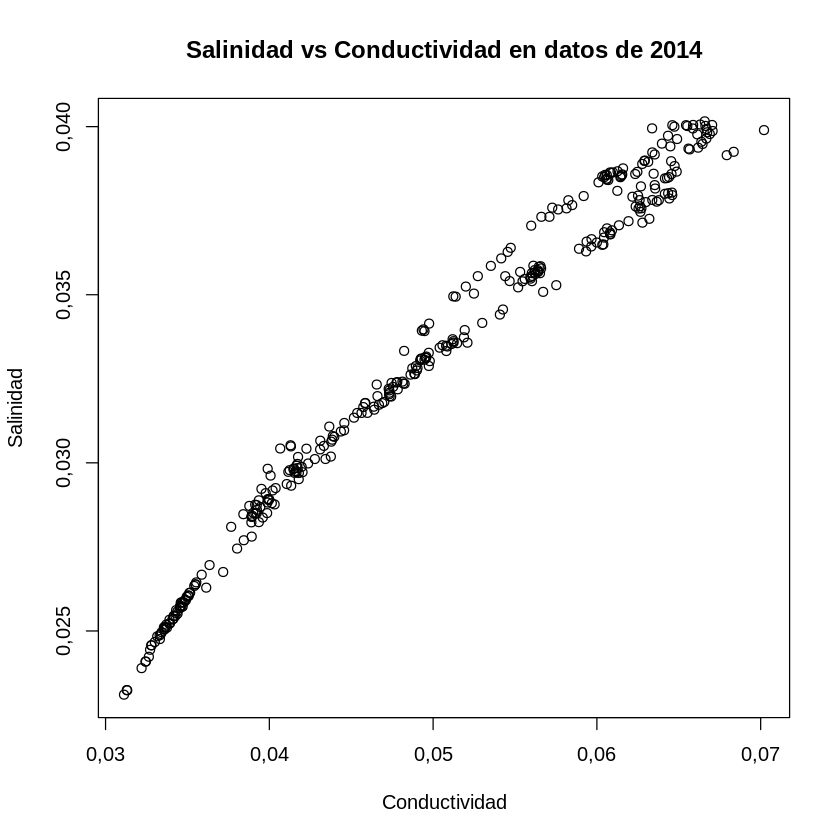

In [35]:
plot(my.data.2014$AVG.Cond., my.data.2014$AVG.Salinity.,
    xlab = "Conductividad",
    ylab = "Salinidad",
    main = "Salinidad vs Conductividad en datos de 2014")


## Ajuste lineal

In [36]:
get.aplha <- function(mat.x, vec.y){
    ones <- rep(c(1),nrow(mat.x))
    mat.x <- cbind(ones,mat.x)
    x.T.x <- solve(t(mat.x) %*% mat.x)
    all.x <- x.T.x %*% t(mat.x)
    alpha <- all.x %*% vec.y
    return(alpha)
}

In [37]:
# Preparo datos 2014
my.x <- matrix(my.data.2014$AVG.Cond.,ncol=1)
my.y <- matrix(my.data.2014$AVG.Salinity.,ncol=1)

In [38]:
my.alpha <- get.aplha(my.x, my.y)
my.alpha

ones,"0,01112899"
,"0,43701462"


In [39]:
pol.1 <- lm(my.y~my.x)
pol.1


Call:
lm(formula = my.y ~ my.x)

Coefficients:
(Intercept)         my.x  
    0,01113      0,43701  


## Ajuste no lineal

### Polinomio de grado 2

In [40]:
get.aplha.2 <- function(mat.x, vec.y){
    ones <- rep(c(1),nrow(mat.x))
    mat.x.2 <- mat.x**2
    mat.x <- cbind(ones,mat.x)
    mat.x <- cbind(mat.x,mat.x.2)
    x.T.x <- solve(t(mat.x) %*% mat.x)
    all.x <- x.T.x %*% t(mat.x)
    alpha <- all.x %*% vec.y
    return(alpha)
}

In [41]:
my.alpha.2 <- get.aplha.2(my.x, my.y)
my.alpha.2

ones,"0,0004062493"
,"0,8910715518"
,"-4,5689833751"


In [42]:
pol.2 <- glm(my.y~poly(my.x, 2, raw = T))
pol.2


Call:  glm(formula = my.y ~ poly(my.x, 2, raw = T))

Coefficients:
            (Intercept)  poly(my.x, 2, raw = T)1  poly(my.x, 2, raw = T)2  
              0,0004062                0,8910716               -4,5689834  

Degrees of Freedom: 338 Total (i.e. Null);  336 Residual
Null Deviance:	    0,008073 
Residual Deviance: 9,718e-05 	AIC: -4137

### Polinomio de grado 3


In [43]:
get.aplha.3 <- function(mat.x, vec.y){
    ones <- rep(c(1),nrow(mat.x))
    mat.x.3 <- mat.x**3
    mat.x.2 <- mat.x**2
    mat.x <- cbind(ones,mat.x)
    mat.x <- cbind(mat.x,mat.x.2)
    mat.x <- cbind(mat.x,mat.x.3)
    x.T.x <- solve(t(mat.x) %*% mat.x)
    all.x <- x.T.x %*% t(mat.x)
    alpha <- all.x %*% vec.y
    return(alpha)
}

In [44]:
my.alpha.3 <- get.aplha.3(my.x, my.y)
my.alpha.3

ones,"-0,01178501"
,"1,67328370"
,"-20,80344419"
,"109,23969616"


In [45]:
pol.3 <- glm(my.y~poly(my.x, 3, raw = T))
pol.3


Call:  glm(formula = my.y ~ poly(my.x, 3, raw = T))

Coefficients:
            (Intercept)  poly(my.x, 3, raw = T)1  poly(my.x, 3, raw = T)2  
               -0,01179                  1,67328                -20,80344  
poly(my.x, 3, raw = T)3  
              109,23970  

Degrees of Freedom: 338 Total (i.e. Null);  335 Residual
Null Deviance:	    0,008073 
Residual Deviance: 9,389e-05 	AIC: -4147

## Test de los ajustes a los datos 2015

In [46]:
# Preparo datos 2015
my.x.2015 <- matrix(my.data.2015$AVG.Cond.,ncol=1)
my.y.2015 <- matrix(my.data.2015$AVG.Salinity.,ncol=1)

### Ajuste lineal

In [47]:
loss.1 <- function(vec.y, mat.x, a){
    ones <- rep(c(1),nrow(mat.x))
    mat.x <- cbind(ones,mat.x)
    y.x.a <- (vec.y - mat.x %*% a)
    my.loss <- t(y.x.a) %*% y.x.a
    return(my.loss)
}

In [48]:
loss.1(my.y.2015,my.x.2015,my.alpha)

"0,0005551753"


### Ajuste de grado 2

In [49]:
loss.2 <- function(vec.y, mat.x, a){
    ones <- rep(c(1),nrow(mat.x))
    mat.x.2 <- mat.x**2
    mat.x <- cbind(ones,mat.x)
    mat.x <- cbind(mat.x,mat.x.2)
    y.x.a <- (vec.y - mat.x %*% a)
    my.loss <- t(y.x.a) %*% y.x.a
    return(my.loss)
}

In [50]:
loss.2(my.y.2015,my.x.2015,my.alpha.2)

"0,0003738079"


### Ajuste de grado 3

In [51]:
loss.3 <- function(vec.y, mat.x, a){
    ones <- rep(c(1),nrow(mat.x))
    mat.x.2 <- mat.x**2
    mat.x.3 <- mat.x**3
    mat.x <- cbind(ones,mat.x)
    mat.x <- cbind(mat.x,mat.x.2)
    mat.x <- cbind(mat.x,mat.x.3)
    y.x.a <- (vec.y - mat.x %*% a)
    my.loss <- t(y.x.a) %*% y.x.a
    return(my.loss)
}

In [52]:
loss.3(my.y.2015,my.x.2015,my.alpha.3)

"0,0003908337"


## Plot

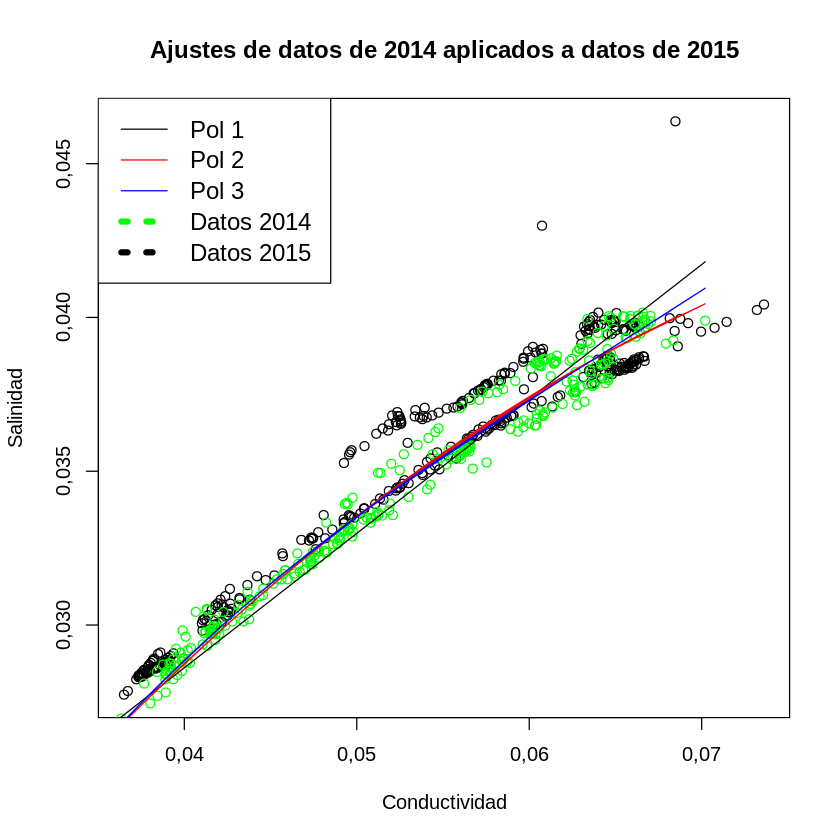

In [53]:
plot(my.data.2015$AVG.Cond., my.data.2015$AVG.Salinity.,
    xlab = "Conductividad",
    ylab = "Salinidad",
    main = "Ajustes de datos de 2014 aplicados a datos de 2015")

points(my.data.2014$AVG.Cond., my.data.2014$AVG.Salinity., col = "green")

x <- c(my.x)

y.1 <- predict(pol.1, newdata = data.frame(x))
lines(x,y.1)

y.2 <- predict(pol.2, newdata = data.frame(x))
lines(x,y.2, col = "red")

y.3 <- predict(pol.3, newdata = data.frame(x))
lines(x,y.3, col = "blue")

legend("topleft", legend=c("Pol 1", "Pol 2", "Pol 3", "Datos 2014", "Datos 2015"),
       col=c("black", "red", "blue", "green", "black"), lwd = c(1,1,1,5,5), lty=c(1,1,1,3,3), cex=1.2)